In [1]:
@time include("../InfectionSim.jl")

 43.369086 seconds (38.85 M allocations: 2.123 GiB, 2.65% gc time)


initState

In [2]:
param = initParams(
    symptomatic_isolation_prob=0.9, 
    asymptomatic_prob=0.65, 
    LOD=5 # Limit of Detection
)

Params
  symptom_dist: LogNormal{Float64}
  Infdistributions: Array{Distribution{Univariate,S} where S<:ValueSupport}((14,))
  symptomatic_isolation_prob: Float64 0.9
  asymptomatic_prob: Float64 0.65
  pos_test_probs: Array{Float64}((14,)) [0.0, 0.0, 0.0, 0.08586, 0.75496, 0.97208, 0.99638, 0.97604, 0.87264, 0.67308, 0.43986, 0.23942, 0.1146, 0.0513]
  test_delay: Int64 0


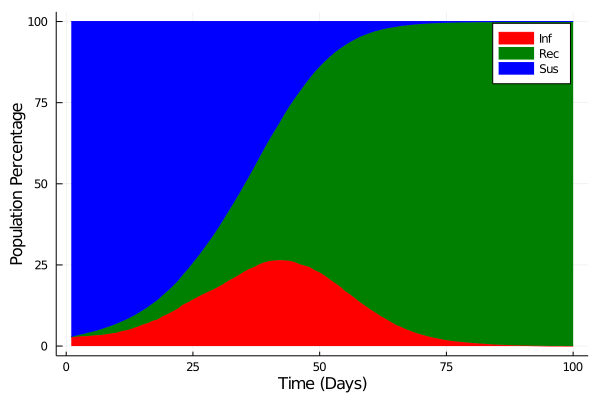

In [3]:
param.test_delay = 0
state = initState(fill(10,14), param, N=5_000)
action = Action(0.1)
simHist = Simulate(100, state, param, action)
plotHist(simHist, kind=:stack, order="IRS",prop=true)

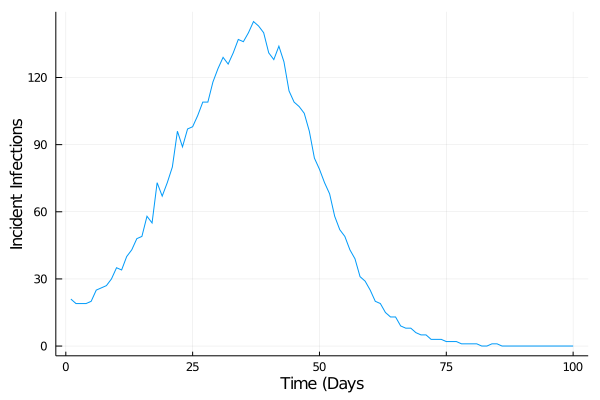

In [4]:
plot(simHist.incident, label="")
xlabel!("Time (Days")
ylabel!("Incident Infections")